#  Bias and Variance
Bias (смещение) - невозможность модели хорошо описать данные.

Variance (разброс)-  разница в описании модели данных различных датасетов

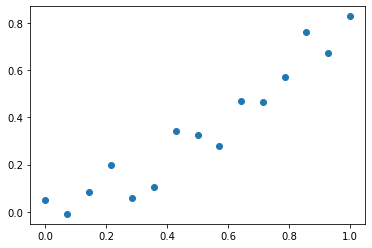

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
np.random.seed(42)

#  Создаем простой датасет
x = np.linspace(0,1,15)
f = 1/2
y = x**2 + np.random.normal(scale=0.1, size=len(x))

data = np.stack((x, y), axis=-1)

plt.scatter(data[:,0], data[:,1]) 

0.004158374034379228


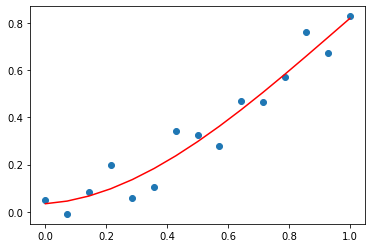

In [2]:
# Обучим хорошую модель, чтобы было видно, какой результат отлично описывал бы данные

good_poly = np.polyfit(data[:,0], data[:,1], deg=3)

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
good_poly_predict = np.polyval(good_poly, data[:,0])

good_poly_mse = mean_squared_error(data[:,1], good_poly_predict)
print(good_poly_mse)
ax.plot(x, good_poly_predict, color="r")

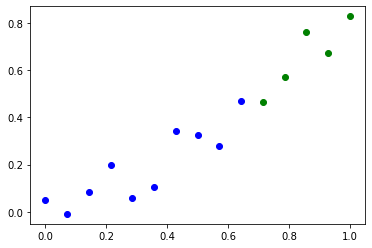

In [3]:
from sklearn.model_selection import train_test_split

# Разделим выборку на трейн и тест
x_train, x_test, y_train, y_test = train_test_split(data[:,0], data[:,1], test_size=0.3, shuffle=False)

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color = "blue")
ax.scatter(x_test, y_test, color = "green")

# Метод с обучением различной степени полиномов. 
Для простых моделей характерно недообучение - в силу своей простоты они не могут "поймать" истинную 
зависимость данных.  Для слишком сложных - наоборот, имеется тенденция к переобучению, модель пытается
"запомнить" данные из обучающей выборки, и как следствие - плохо работает на новых данных

In [4]:
def fit_model(deg):

    poly = np.polyfit(x_train, y_train, deg=deg)

    train_predicts = np.polyval(poly, x_train)
    train_mse = mean_squared_error(y_train, train_predicts)
    print("Train MSE: {}", train_mse)

    test_predicts = np.polyval(poly, x_test)
    test_mse = mean_squared_error(y_test, test_predicts)
    print("Test MSE: {}", test_mse)

    fig, ax = plt.subplots()
    ax.scatter(x_train, y_train, color = "blue")
    ax.plot(x_train, train_predicts, color="r")
    ax.scatter(x_test, y_test, color = "green")

Train MSE: {} 0.0052938374746952415
Test MSE: {} 0.02262855414738571


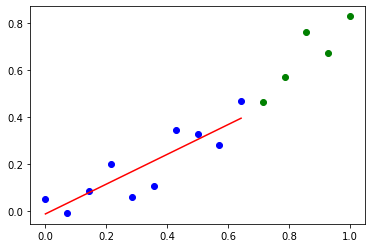

In [5]:
# Простейшая линейная регрессия. На тренировочных данных обучилась так себе, предсказания тоже не очень 
# хороши. У этой модели средний Bias, и средний Variance.
fit_model(deg = 1)

<ipython-input-6-8eb506d66815>:5: RankWarning: Polyfit may be poorly conditioned
  fit_model(deg = 15)


Train MSE: {} 1.8980861906735286e-25
Test MSE: {} 5011764330.8648205


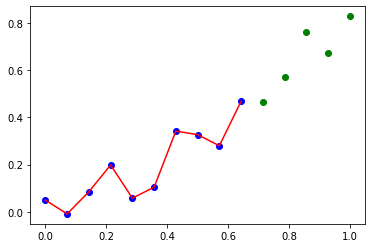

In [6]:
# Переобученная модель с 15 степенью. Она просто зазубрила тренировочные данные, за счет этого у 
# неё низкий Bias. Однако Variance большой - на новых данных, которые эта модель не видела, она совершенно
# не способна ничего обьяснить. Уж лучше средненький Variance, чем высокий, всё таки модели мы строим для
# работы на новых данных.
fit_model(deg = 15)

Взаимосвязь между Bias и Variance хорошо отражает следующий график

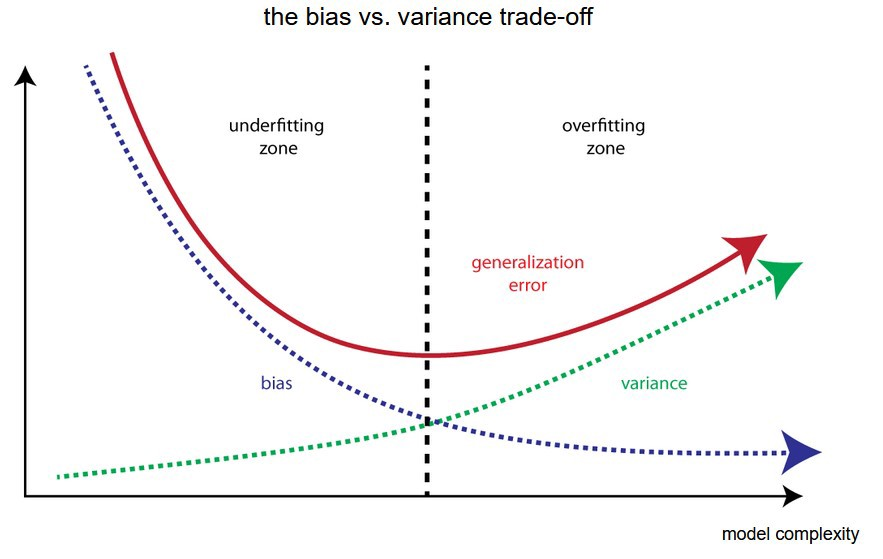

Low-Bias, Low-Variance:
Идеальная модель, к которой стоит стремиться. На практике почти никогда не встречается.
<br>
<br>
Low-Bias, High-Variance: 
Хорошие показатели на тренировочных данных, и низкие - на тестовых. Переобученная модель, что мы и наблюдали в примере.
<br>
<br>
High-Bias, Low-Variance: 
Модель плохо описала тестовые данные, но вот с тренировочными справилась лучше. Модель недообучена, из неё еще можно выжать результат лучше.
<br>
<br>
High-Bias, High-Variance:
Всё плохо, как на тренировочном так и на тестовом датасете. 

# Какие есть способы улучшить ситуацию? 

Early stopping: Этот метод старается остановить обучение до того, как модель начнет переобучаться на шуме. Такой подход имеет риск вызвать противоположную проблему - недообучение. Конечная цель здесь — найти «золотую середину» между недообучением и переобучением.
<br>
<br>
Train with more data: Здесь всё просто - больше данных, сильнее обобщающая способность модели. Конечно тут тоже есть свои ньюансы.
<br>
<br>
Data augmentation: Хотя лучше всего использовать чистые данные, иногда можно ввести зашумлённые данные, чтобы сделать модель более стабильной.
<br>
<br>
Feature selection: Зачастую разные алгоритмы по разному реагируют на фичи. Иногда от фич больше вреда, чем пользы. Особо это проявляется, когда фич становится очень много. Отбор фич позволяет отобрать только действительно важные, остальные - откинуть. 
<br>
<br>
Regularization: Когда модель слишком сложная, хорошо бы дропнуть несколько фич. Регуляризация накладывает штраф за излишнюю сложность модели. L1, Lasso, dropout - всё это разновидности регулярирации.
<br>
<br>
Ensemble methods: Самые известные методы это беггинг и бустинг. При бэггинге берётся случайная выборка данных в обучающем наборе, некоторые  данные могут быть выбраны более одного раза.
После алгоритмы обучаются на таких "различных" наборах данных, их усрёдненный ответ зачастую лучше, чем ответ каждого алгоритма в отдельности.